# <center>Semillero Quantum Computing</center>

## <center>Hands-On: Representación de Qubits</center>


<center>Judol Alejandro Rodríguez Franco
<center>Universidad Nacional De Colombia
<center>Observatorio Astronómico Nacional
<center>Facultad De Ciencias

---
### <center>Abstract</center>

<center>Práctica de Qiskit realizada en lenguaje python con ayuda de notebooks de Jupyter</center>

---

### Primer paso: Configurar nuestro entorno

Recordemos que, antes de trabajar es necesario contar con las herramientas necesarias, este paso se debe hacer siempre que se inicie un cuaderno de`Jupyter`. Usaremos Qiskit Aer que nos permite simular y visualizar la matemática que estamos trabajando.

In [9]:
#Instalamos el paquete de Qiskit que contiene ejemplos y códigos contenidos en el libro
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-tjapld70
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-tjapld70
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 56445ab2fa8aacd50decdeed8dd3c5149369a2b9
  Preparing metadata (setup.py) ... done


In [2]:
#Usar matplotlib como graficador predeterminado
import matplotlib as mpl
circuit_drawer = mpl

In [11]:
#Instalamos el paquete que nos permite darle formato a las ecuaciones
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#Sincronizar con la versión de Qiskit usada en los ejemplos del libro
import qiskit.tools.jupyter
%qiskit_version_table

In [5]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

Representación algebraica de estados y operaciones

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\bra{\Psi}\Omega\ket{\Psi}$$

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\braket{\Psi}{\Psi}$$
$$\braket{\frac{\Psi}{2}}{\Psi}$$

\begin{align}
\braket{Paw_L}{Paw_R} = 0
\end{align}

###Representación de Qubits: Esfera de Bloch

Como se mencionó la sesión anterior, el álgebra lineal la herramienta matemática que ayuda a describir los estados cuánticos. En la representación usual cartesiana, una 'flecha' o vector cualquiera se representa como la suma o superposición de dos vectores:

<p align="center">
  <img src="https://studywell.com/wp-content/uploads/2021/05/2DVectors.png" alt="Quantum Simulator" width="700">
</p>

Sin embargo, en la representación usada en computación cuántica, los vectores se mueven en una esfera llamada ***Esfera de Bloch***, y en esta esfera los vectores base se encuentran apuntando hacia arriba y hacia abajo:

$$\begin{align}
    \ket{0} = 
   \begin{bmatrix}
           1\\
           0
    \end{bmatrix} 
  \end{align}$$

  $$\begin{align}
    \ket{1} = 
   \begin{bmatrix}
           0\\
           1
    \end{bmatrix} 
  \end{align}$$



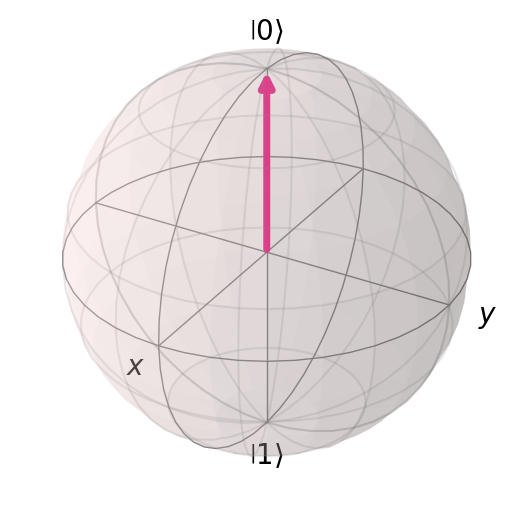

In [12]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords0 = [0,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords0) # Bloch Vector with spherical coordinates

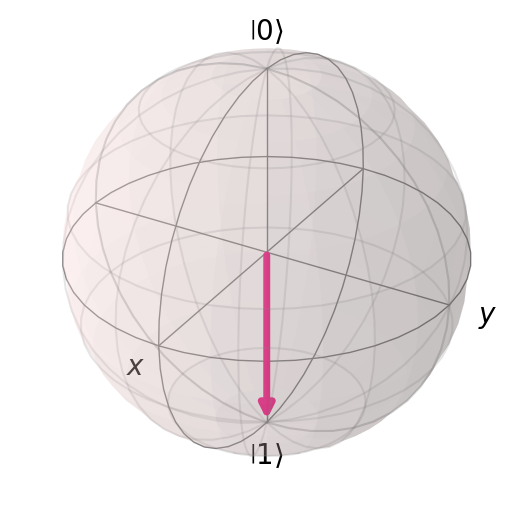

In [7]:
coords1 = [2*pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords1) # Bloch Vector with spherical coordinates

pero, ¿Cómo puedo representar un estado que apunte horizontalmente si sólo tengo dos estados verticales? Para ello se introduce el concepto de fase, el cual consiste en rotar los estados verticales. La representación matemática es la siguiente:

$$\ket{q} = \alpha \ket{0} + \beta \ket{1}$$

y en particular, para representar el quibit en esta esfera de Bloch, los coeficientes $\alpha$ y $\beta$ están dados por las expresiones:

$$\alpha=cos\Big(\frac{\theta}{2}\Big)$$
$$\beta = e^{i\phi}sin\Big(\frac{\theta}{2}\Big)$$

de manera que 

$$\ket{q} = cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}$$

y, dándole valores a $\theta$ y a $\phi$ ya podemos tener la representación de cualquier Qubit:

In [8]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…


<center>Ejercicio 1</center>

**Calcular los valores de $\theta$ y $\phi$ que permiten representar los siguientes Qubits y representarlos gráficamente:**

  1. $\ket{0}$
  2. $\ket{1}$
  3. $\frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big)$
  4. $\frac{1}{\sqrt{2}}\Big(\ket{0} - i \ket{1}\Big)$
  5. $\frac{1}{\sqrt{2}} i \ket{1}$